# Exercise: Predict Diabetes with a Linear Regression Model

In this exercise, we'll predict a patient's diabetes desease progression from different health indicators such as body mass index, age, blood pressure etc. 

Your tasks are the following:

- Get an overview of the dataset
- Plot a histogram of the data
- Plot the correlation matrix
- Split into training and test data
- Train a linear regression model
- Evaluate the model and plot the results

## 1. Data Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

**TODO**: Load in the diabetes dataset from scikit-learn and get familiar with the dataset. Find out these basic properties:

- How many samples does the dataset have?
- How many features does the dataset have?
- Are there any null values that we have to take care of?
- Has the data been standardized already or do we have to take care of this?
- Does the dataset contain numerical or categorical values or both?

In [2]:
# TODO: YOUR CODE GOES HERE

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target



In [3]:
# How many samples and features does dataset have?

print(f"Dataset has: {df.shape[0]} samples and {df.shape[1]-1} rows")

Dataset has: 442 samples and 10 rows


In [4]:
# check for null columns.  Per below there are no such columns.

df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [13]:
#has data been standardised


In [6]:
# does data set have categorical or numerical values or both.  Answer: numerical

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**YOUR ANSWER**:

**TODO**: Plot a histogram in matplotlib to get an overview of the data.

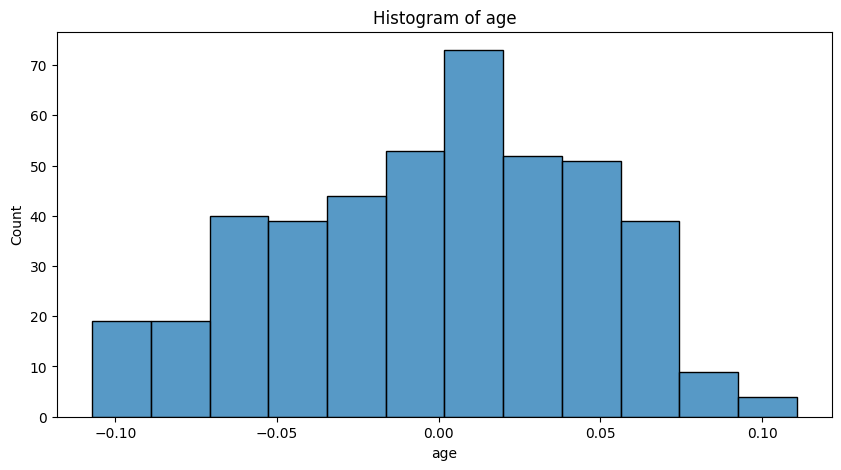

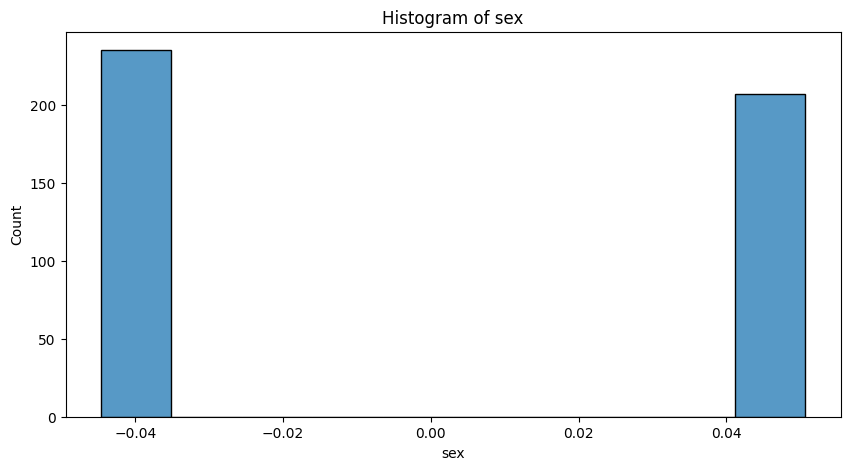

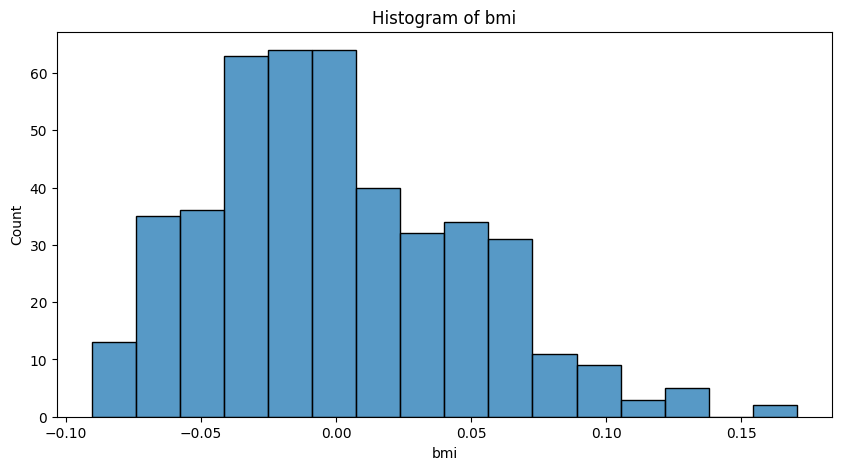

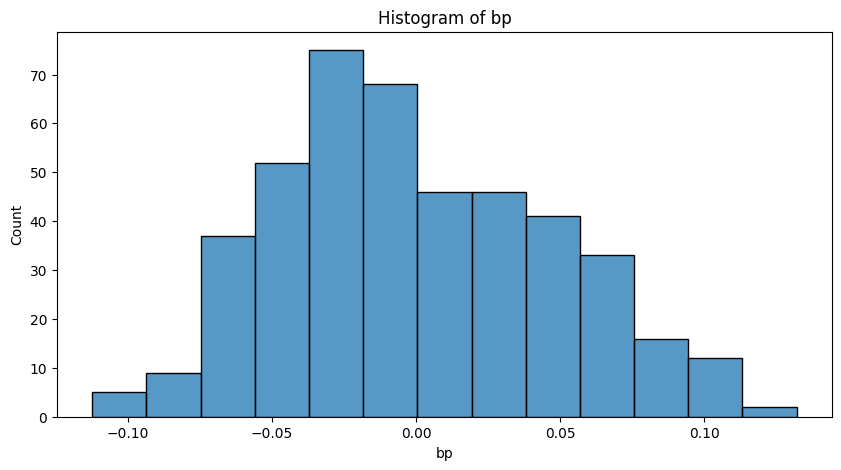

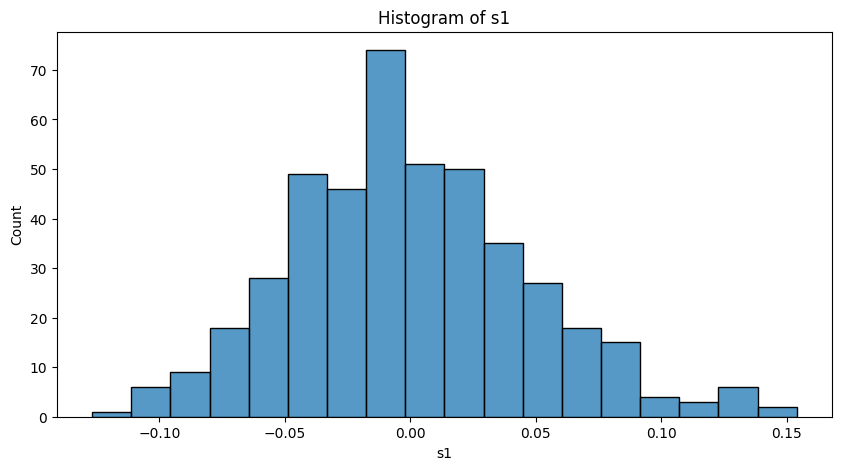

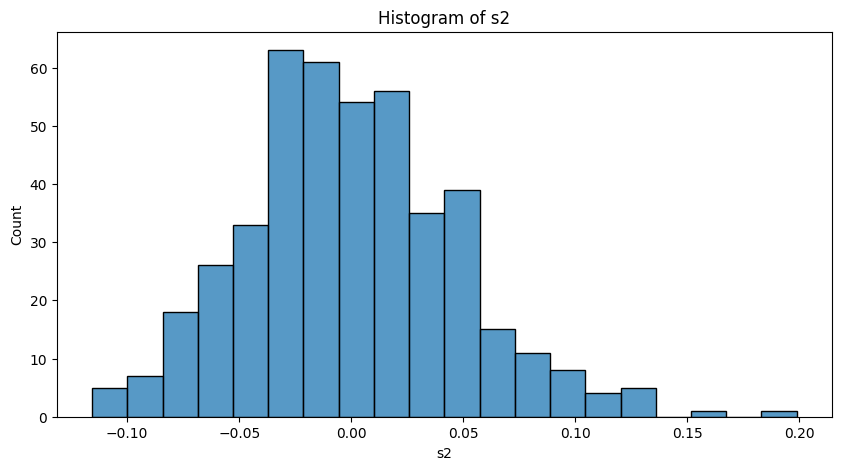

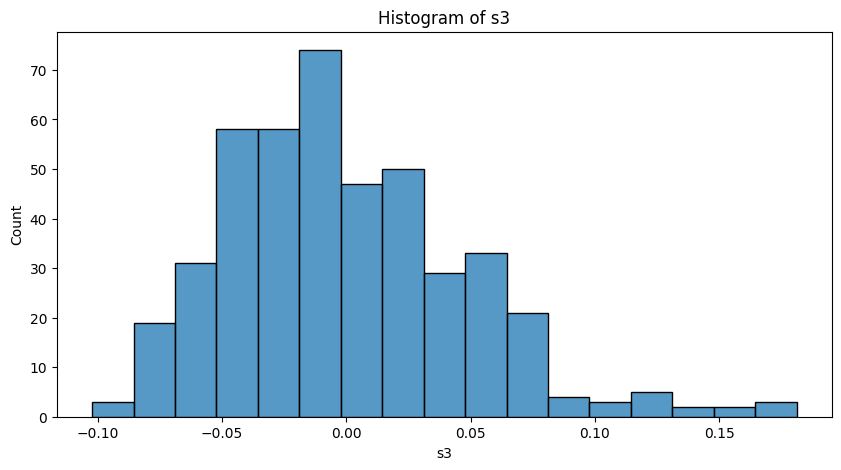

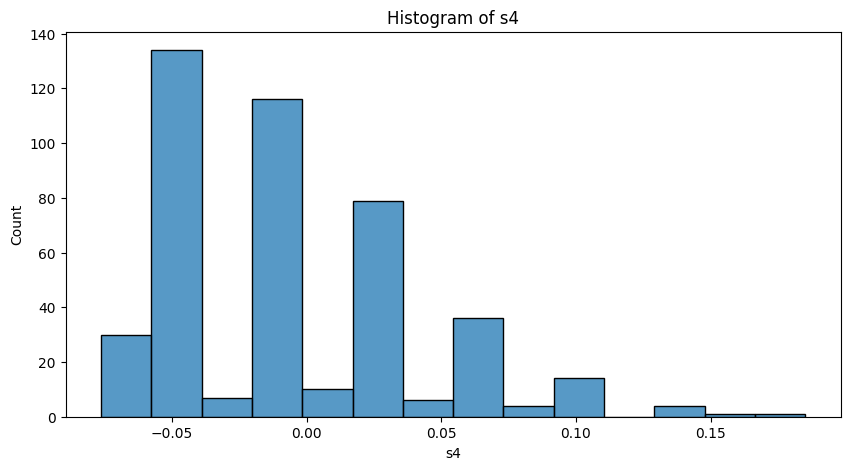

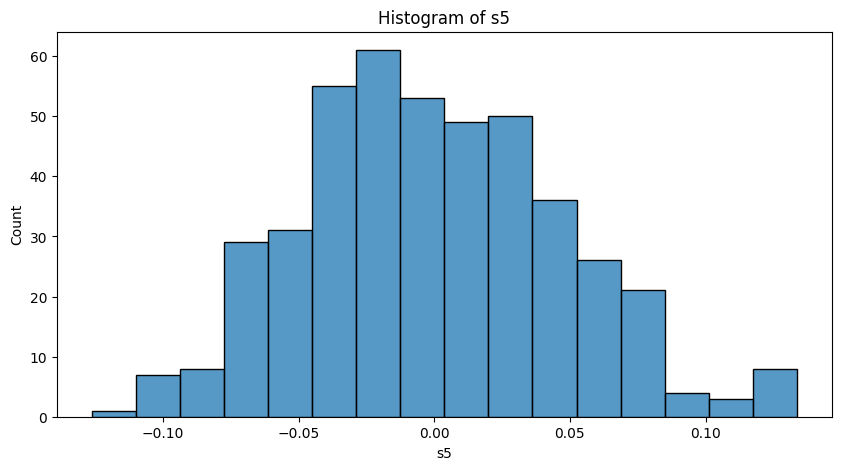

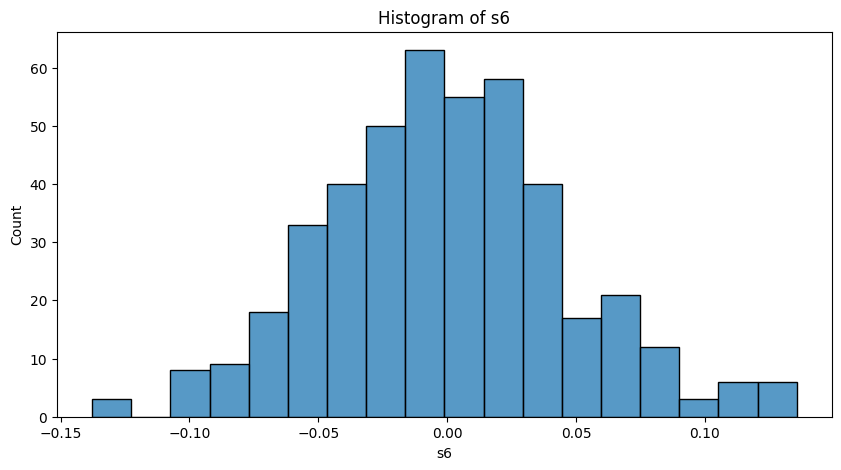

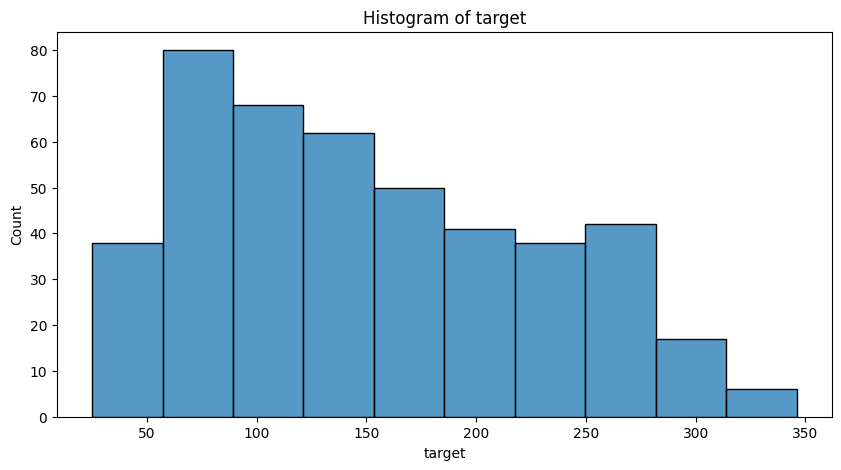

In [7]:
# TODO: YOUR CODE GOES HERE

for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(x=df[col])
    plt.title(f'Histogram of {col}')
plt.show()

**TODO**: Calculate the linear correlation matrix of the features and the target and plot the results. Which feature is the most important for our prediction goal?

<Axes: >

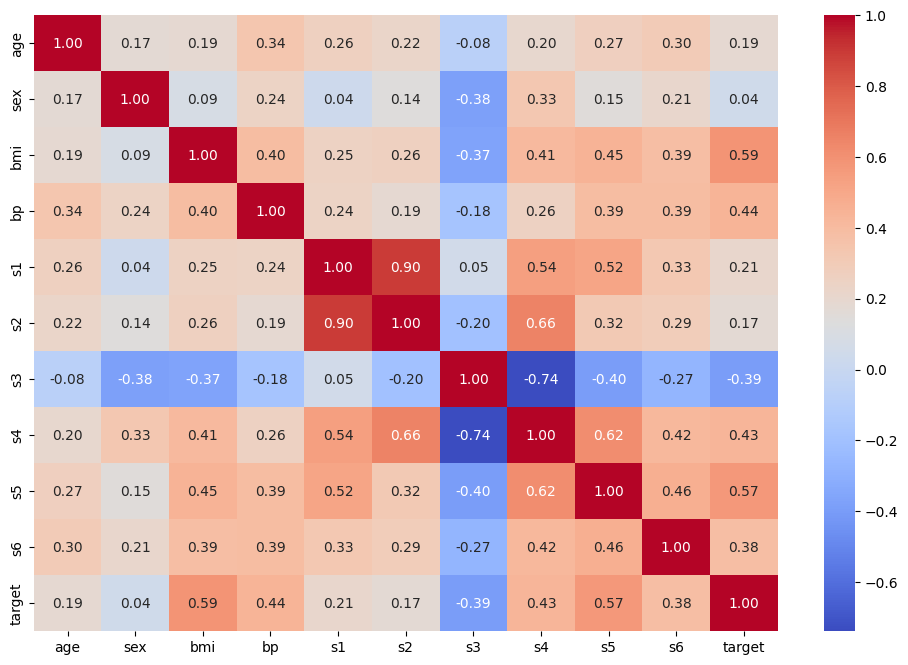

In [8]:
# TODO: YOUR CODE GOES HERE

# prep correlation matrix.  Focusing on our target metric, it appears BMI is most correlated.

mtx = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(mtx, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)


**YOUR ANSWER**:

## 2. Training and Evaluation

**TODO**: Store the features and labels in dataframes called `X` and `y`, respectively. Create a train and test split with 80% training data and 20% test data.

In [9]:
# TODO: YOUR CODE GOES HERE

# Create X and Y datasets

y = df.target
X = df.drop('target', axis=1)

# Split the data into training and testing subsets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate linear regression model

model = LinearRegression()

# Fit the model

model.fit(X_train, y_train)

# predict

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)




Mean Squared Error: 2900.193628493482
R-squared: 0.45260276297191937


**TODO**: Create and train a linear regression model.

In [ ]:
# TODO: YOUR CODE GOES HERE

**TODO**: Evaluate the model on the test dataset: make predictions and calculate the RMSE.

In [ ]:
# TODO: YOUR CODE GOES HERE

**TODO**: Train a simple linear regression model with only the most important feature for comparison and plot the predictions and the measurements. Do you think we have found a reasonable model according to the plot?

Mean Squared Error: 2901.8369415567036
R-squared: 0.4522925957397932


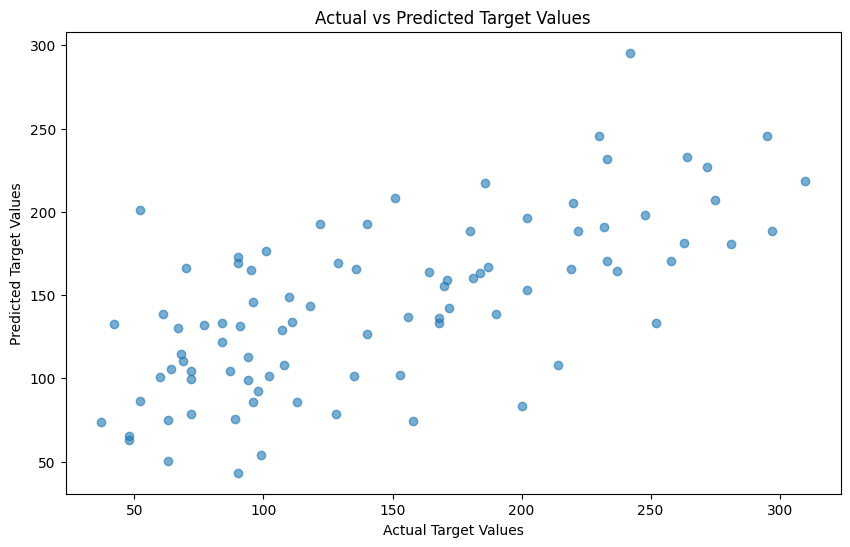

In [ ]:
# TODO: YOUR CODE GOES HERE

# prepare a linear regression model that predicts target based on bmi which
# is most correlated feature per heatmap above

# Create X and Y datasets for BMI

y = df.target
X = df[['bmi', 's5']]

# Split the data into training and testing subsets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values')

plt.show()

**YOUR ANSWER**: